## Observations and Insights 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import scipy.stats as st
import os
import pandas as pd
import numpy as np

# import pandas as pd
# Study data files

mouse_metadata_path = os.path.join(".","data","Mouse_metadata.csv")
study_results_path = os.path.join(".","data","Study_results.csv")
pd.set_option("display.max_rows",1893)
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata
# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on = 'Mouse ID' )
# Display the data table for preview


In [3]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
df.columns.values

array(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype=object)

In [6]:
# Checking the number of mice.
number_od_mice = df['Mouse ID'].count()
print(f'The total number of mice is {number_od_mice}')
print(f"The unique number of mice is {df['Mouse ID'].nunique()}")

The total number of mice is 1893
The unique number of mice is 249


In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
df_clean.reset_index(inplace=True,drop= True)
df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
Total_number_duplicated = df.loc[df[['Mouse ID','Timepoint']].duplicated(keep='first')]
Total_number_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Checking the number of mice in the clean DataFrame.
total_number,*_ = df_clean.count()
total_number

1888

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
statistics = df_clean.copy()
statistics.set_index('Drug Regimen',inplace=True)
mean = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
standard_deviation = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'variance': variance,
    'STD': standard_deviation,
    'SEM': sem,
    
})

summary_df

,Mean,Median,variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function 
summary_statistics = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

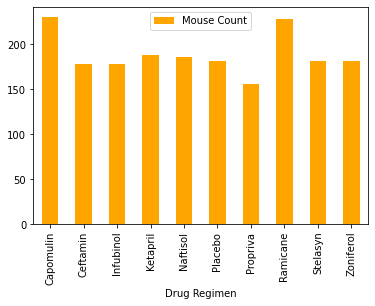

NameError: name 'bottom' is not defined

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
selected_df = df_clean[['Drug Regimen','Mouse ID']]
selected_df_bar = selected_df.groupby(["Drug Regimen"]).count().reset_index()
selected_df_bar.plot.bar(x = 'Drug Regimen', y = 'Mouse ID',label = 'Mouse Count',fc = 'orange')
plt.show()
print(bottom)

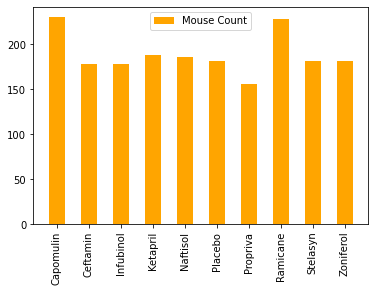

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = selected_df_bar['Drug Regimen']
y = selected_df_bar['Mouse ID']
plt.bar(x,y,width=0.5,label = 'Mouse Count',fc = 'orange')
plt.xticks(rotation ='vertical')
plt.legend()
plt.show()

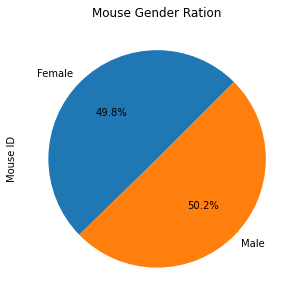

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = df_clean[['Sex','Mouse ID']]
pie_plot = pie_plot.groupby('Sex')['Mouse ID'].nunique()
pie_plot.plot(kind='pie',figsize=(5, 5),startangle=45,autopct='%1.1f%%',title="Mouse Gender Ration")
plt.show()

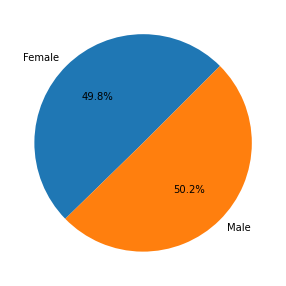

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot_mat = pd.DataFrame(pie_plot)
x = (pie_plot_mat.loc['Female'])
y = (pie_plot_mat.loc['Male'])
data = [x,y]
labels = ['Female','Male']
fig = plt.figure(figsize =(5, 5)) 
plt.pie(np.array(data).ravel(),autopct='%1.1f%%',labels = labels,startangle=45)
plt.show()

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol = df.set_index("Drug Regimen", append=False)
tumor_vol = tumor_vol.sort_values("Timepoint",ascending=False)
tumor_vol = tumor_vol.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
#grouped by Mouse ID
grouped_tumor_vol= tumor_vol.groupby("Mouse ID")['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_max_timepoint = pd.DataFrame(grouped_tumor_vol)
tumor_volume_max_timepoint = pd.merge(tumor_volume_max_timepoint, df, on=("Mouse ID","Timepoint"),how="left")
tumor_volume_max_timepoint.reset_index(drop=True,inplace = True)

tumor_volume_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


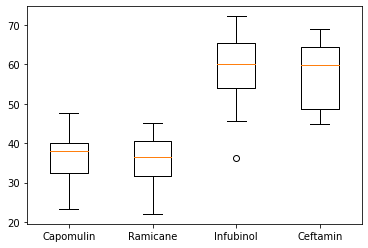

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    #    # Locate the rows which contain mice on each drug and get the tumor volumes
#        timepoint_max.loc[timepoint_max['Drug Regimen'] == drug]['Tumor Volume (mm3)']
       tumor_vol_list.append(tumor_volume_max_timepoint.loc[tumor_volume_max_timepoint['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
     # add subset 

     # Determine outliers using upper and lower bounds
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

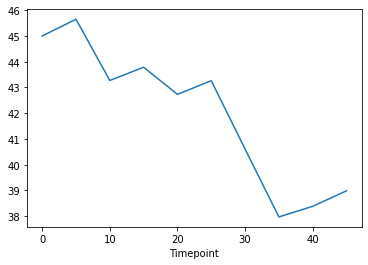

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_line = df_clean.loc[df['Drug Regimen'] == 'Capomulin']
df_line = df_line.reset_index(drop = True)
mouses = df_line['Mouse ID'].unique()
df_line = df_line.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].max()
df_line
df_line['b128'].plot(kind = 'line',x = 'Timepoint',y ='Tumor Volume (mm3)', label = 'b128' )
    

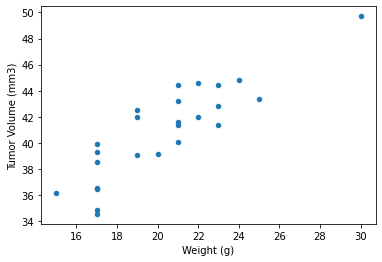

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_scatter = df_clean.copy()
df_scatter = df_scatter.loc[df['Drug Regimen'] == 'Capomulin']
df_scatter = df_scatter.groupby(['Mouse ID','Weight (g)'],as_index = False).agg('mean')
df_scatter.plot.scatter(x='Weight (g)',y = 'Tumor Volume (mm3)' )
# df_scatter.reset_index(drop=True)

In [ ]:
df_scatter.plot(kind = 'scatter',x='Mouse ID', y = 'Tumor Volume (mm3)' )

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
